## 0. Load imports 

In [2]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 0. Load data

In [3]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.001753,38.821632,18048023,2020/10/21 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,4600 - 4799 BLOCK OF SOUTH CAPITOL STREET,399848.0,128205.0,...,009811 1,9811.0,Precinct 125,38.821624,-77.001750,NaN,2018/03/26 08:40:06+00,2018/03/26 10:04:44+00,495550729,NaN
1,-77.021403,38.915570,20129574,2020/09/10 22:22:38+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,620 - 699 BLOCK OF T STREET NW,398144.0,138633.0,...,004801 2,4801.0,Precinct 137,38.915562,-77.021401,NaN,2020/09/09 19:00:16+00,2020/09/10 20:22:11+00,495559019,NaN
2,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,495562868,NaN
3,-77.023981,38.900345,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 9TH STREET NW,397920.0,136943.0,...,005802 5,5802.0,Precinct 129,38.900337,-77.023979,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,495562872,NaN
4,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,495562874,NaN


(27932, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27932 entries, 0 to 27931
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27932 non-null  float64
 1   Y                     27932 non-null  float64
 2   CCN                   27932 non-null  int64  
 3   REPORT_DAT            27932 non-null  object 
 4   SHIFT                 27932 non-null  object 
 5   METHOD                27932 non-null  object 
 6   OFFENSE               27932 non-null  object 
 7   BLOCK                 27932 non-null  object 
 8   XBLOCK                27932 non-null  float64
 9   YBLOCK                27932 non-null  float64
 10  WARD                  27932 non-null  int64  
 11  ANC                   27932 non-null  object 
 12  DISTRICT              27903 non-null  float64
 13  PSA                   27897 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27932 non-null  object 
 15  BLOCK_GROUP        

#### Warm-up: Ways to add 100 to column X

In [15]:
%%time
df.X + 100

CPU times: user 1.76 ms, sys: 183 µs, total: 1.94 ms
Wall time: 1.88 ms


0        22.998247
1        22.978597
2        23.027774
3        22.976019
4        23.027349
           ...    
27927    22.977496
27928    22.970375
27929    23.021993
27930    23.070771
27931    22.955837
Name: X, Length: 27932, dtype: float64

In [16]:
%%time
new_list = []

for x in df.X:
    new_list.append(x+100)

CPU times: user 11.8 ms, sys: 600 µs, total: 12.4 ms
Wall time: 13.2 ms


In [4]:
a = df.OFFENSE.value_counts()
a

OFFENSE
THEFT/OTHER                   10926
THEFT F/AUTO                   8284
MOTOR VEHICLE THEFT            3259
ROBBERY                        1998
ASSAULT W/DANGEROUS WEAPON     1632
BURGLARY                       1444
HOMICIDE                        198
SEX ABUSE                       178
ARSON                            13
Name: count, dtype: int64

<BarContainer object of 9 artists>

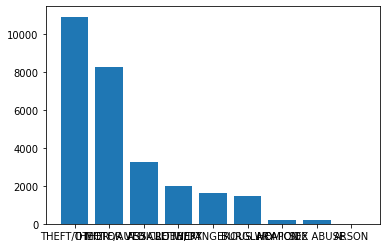

In [6]:
plt.bar(a.index, a.values, )

In [7]:
for i, ddf in df.groupby("OFFENSE"):
    if i == 2:
        break

In [38]:
ddf[["OFFENSE", "X", "Y"]]

,OFFENSE,X,Y
6,THEFT/OTHER,-76.979895,38.868231
7,THEFT/OTHER,-77.033266,38.909657
9,THEFT/OTHER,-76.986918,38.900203
11,THEFT/OTHER,-76.944472,38.869598
12,THEFT/OTHER,-77.008219,38.875556
...,...,...,...
27920,THEFT/OTHER,-77.033954,38.926422
27921,THEFT/OTHER,-76.993152,38.922219
27923,THEFT/OTHER,-77.032733,38.929521
27926,THEFT/OTHER,-77.070211,38.913641


## 1. Aggregation

### Example of grouping by one variable and doing one aggregation 

**Task**: find and print the number of unique offense types (`OFFENSE`) by ward (`WARD`)

In [3]:
%%time
df.groupby("WARD")["OFFENSE"].nunique()

CPU times: user 12.1 ms, sys: 4.27 ms, total: 16.3 ms
Wall time: 17.3 ms


WARD
1    9
2    9
3    8
4    8
5    9
6    9
7    9
8    9
Name: OFFENSE, dtype: int64

In [4]:
%%time
df1 = df.groupby("WARD")["OFFENSE"].unique()
df1.apply(len)

CPU times: user 14.2 ms, sys: 4.61 ms, total: 18.8 ms
Wall time: 16.3 ms


WARD
1    9
2    9
3    8
4    8
5    9
6    9
7    9
8    9
Name: OFFENSE, dtype: int64

### Example of grouping by one variable and providing two summaries of the same variable

**Task**: previous showed number of offenses by ward but want to find out content of offenses in each ward; create an aggregation that summarizes both the number of unique offenses by ward and what those offenses are -- for instance, by pasting the unique offenses in that ward separated by the ";" (e.g., Theft; Burglary;...)

*Hint*: you can use the join command to paste together a list separated by some delimiter. 
    - The syntax, if we are using the comma delimiter, is: ", ".join(nameoflist)

In [9]:
df1 = df.groupby("WARD")["OFFENSE"].unique()

def count_fx(x):
    return len(x)

def join_text(x):
    return "; ".join(x)

new_list = []
for i, l in list( df1.items() ):
    new_list.append( join_text(l))
    
df1.apply(count_fx)
df2 = df1.reset_index()
df2["uniq_off_by_ward"] = new_list
df2

WARD
1    9
2    9
3    8
4    8
5    9
6    9
7    9
8    9
Name: OFFENSE, dtype: int64

,WARD,OFFENSE,uniq_off_by_ward
0,1,"[MOTOR VEHICLE THEFT, BURGLARY, THEFT F/AUTO, ...",MOTOR VEHICLE THEFT; BURGLARY; THEFT F/AUTO; T...
1,2,"[THEFT F/AUTO, THEFT/OTHER, BURGLARY, ASSAULT ...",THEFT F/AUTO; THEFT/OTHER; BURGLARY; ASSAULT W...
2,3,"[THEFT F/AUTO, THEFT/OTHER, MOTOR VEHICLE THEF...",THEFT F/AUTO; THEFT/OTHER; MOTOR VEHICLE THEFT...
3,4,"[THEFT/OTHER, THEFT F/AUTO, ROBBERY, MOTOR VEH...",THEFT/OTHER; THEFT F/AUTO; ROBBERY; MOTOR VEHI...
4,5,"[THEFT F/AUTO, THEFT/OTHER, BURGLARY, MOTOR VE...",THEFT F/AUTO; THEFT/OTHER; BURGLARY; MOTOR VEH...
5,6,"[THEFT/OTHER, THEFT F/AUTO, ASSAULT W/DANGEROU...",THEFT/OTHER; THEFT F/AUTO; ASSAULT W/DANGEROUS...
6,7,"[THEFT/OTHER, MOTOR VEHICLE THEFT, THEFT F/AUT...",THEFT/OTHER; MOTOR VEHICLE THEFT; THEFT F/AUTO...
7,8,"[HOMICIDE, THEFT/OTHER, THEFT F/AUTO, BURGLARY...",HOMICIDE; THEFT/OTHER; THEFT F/AUTO; BURGLARY;...


In [12]:
df1 = df.groupby("WARD")["OFFENSE"].unique()
df1 = df1.reset_index()
df1["nuniques"] = df1.OFFENSE.apply(len)
df1["uniq_off_by_ward"] = df1.OFFENSE.apply(join_text)

df1[["WARD", "nuniques", "uniq_off_by_ward"]]

,WARD,nuniques,uniq_off_by_ward
0,1,9,MOTOR VEHICLE THEFT; BURGLARY; THEFT F/AUTO; T...
1,2,9,THEFT F/AUTO; THEFT/OTHER; BURGLARY; ASSAULT W...
2,3,8,THEFT F/AUTO; THEFT/OTHER; MOTOR VEHICLE THEFT...
3,4,8,THEFT/OTHER; THEFT F/AUTO; ROBBERY; MOTOR VEHI...
4,5,9,THEFT F/AUTO; THEFT/OTHER; BURGLARY; MOTOR VEH...
5,6,9,THEFT/OTHER; THEFT F/AUTO; ASSAULT W/DANGEROUS...
6,7,9,THEFT/OTHER; MOTOR VEHICLE THEFT; THEFT F/AUTO...
7,8,9,HOMICIDE; THEFT/OTHER; THEFT F/AUTO; BURGLARY;...


In [14]:
def get_uniq_offenses(X):
    uniq_offs = sorted( X.unique() )
    uniq_offs = "; ".join( uniq_offs )
    return uniq_offs

A = uniq_off_valcount_byward = df.groupby("WARD").agg(
        {"OFFENSE": ["nunique", get_uniq_offenses]}
        )
A

OFFENSE                                                   
     nunique                                  get_uniq_offenses
WARD                                                           
1          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...
2          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...
3          8  ASSAULT W/DANGEROUS WEAPON; BURGLARY; HOMICIDE...
4          8  ASSAULT W/DANGEROUS WEAPON; BURGLARY; HOMICIDE...
5          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...
6          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...
7          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...
8          9  ARSON; ASSAULT W/DANGEROUS WEAPON; BURGLARY; H...

### Example of grouping by two variables 

**Task**: group by ward (`WARD`) and police shift (`SHIFT`) and find the offense that is most common in that ward and shift

In [79]:
def add_100(x):
    return x+100
add_100(200)

300

In [81]:
add_100_lmbd = lambda x: x+100

In [8]:
df.groupby(["WARD", "SHIFT"]).agg(
    {
        "OFFENSE": lambda x: x.mode()
    }
).reset_index()

,WARD,SHIFT,OFFENSE
0,1,DAY,THEFT/OTHER
1,1,EVENING,THEFT/OTHER
2,1,MIDNIGHT,THEFT/OTHER
3,2,DAY,THEFT/OTHER
4,2,EVENING,THEFT/OTHER
5,2,MIDNIGHT,THEFT/OTHER
6,3,DAY,THEFT/OTHER
7,3,EVENING,THEFT/OTHER
8,3,MIDNIGHT,THEFT/OTHER
9,4,DAY,THEFT F/AUTO


In [9]:
df.groupby(["WARD", "SHIFT"]).agg(
    {
        "OFFENSE": max
    }
).reset_index()

,WARD,SHIFT,OFFENSE
0,1,DAY,THEFT/OTHER
1,1,EVENING,THEFT/OTHER
2,1,MIDNIGHT,THEFT/OTHER
3,2,DAY,THEFT/OTHER
4,2,EVENING,THEFT/OTHER
5,2,MIDNIGHT,THEFT/OTHER
6,3,DAY,THEFT/OTHER
7,3,EVENING,THEFT/OTHER
8,3,MIDNIGHT,THEFT/OTHER
9,4,DAY,THEFT/OTHER


## Summarizing over all rows or all columns (without grouping)

We can also use the `apply` function to summarize rows or columns efficiently

**Task**: find the mean lat and longitude in one line of code

In [87]:
df[["X","Y"]].apply(np.mean, axis=0)

X   -77.00705
Y    38.90762
dtype: float64

In [88]:
df[["X","Y"]].mean()

X   -77.00705
Y    38.90762
dtype: float64

In [23]:
A = pd.DataFrame(np.array([[True, True, False],
                 [True, True, False]]).T, columns = ["x","y"])
(~A.x)

0    False
1    False
2     True
Name: x, dtype: bool